In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('Display.max_colwidth', None)
df = pd.read_csv('news.csv')

C:\Users\willi\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\willi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
len(df)

6335

In [3]:
import re
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('Punkt')
import string

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading Punkt: Package 'Punkt' not found in index


In [4]:
def lower(text):
    new_text = text.lower()
    return new_text

In [5]:
def remove_punc(text):
    new_text = re.sub(r'[^\w\s]', '',text)
    return new_text    

In [6]:
def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    new_text = ' '.join(word for word in text.split() if word not in stop)
    return new_text

In [7]:
def tokens(text):
    new_text = nltk.word_tokenize(text)
    new_text = ' '.join(new_text)
    return new_text

In [8]:
def sent_tokens(text):
    new_text = nltk.sent_tokenize(text)
    new_text = ' '.join(new_text)
    return new_text

## Changing the order improved false preds precision

In [9]:
df['new_title'] = df['title'].apply(tokens)

In [10]:
df['new_text'] = df['text'].apply(tokens)

In [11]:
df['new_text'] = df['new_text'].apply(sent_tokens)

In [12]:
df['new_title'] = df['new_title'].apply(lambda x: x.lower())

In [13]:
df['new_text'] = df['new_text'].apply(lambda x: x.lower())

In [14]:
df['new_title'] = df['new_title'].apply(remove_punc)

In [15]:
df['new_text'] = df['new_text'].apply(remove_punc)

In [16]:
df['new_title'] = df['new_title'].apply(remove_stopwords)

In [17]:
df['new_text'] = df['new_text'].apply(remove_stopwords)

In [18]:
training_data = df[['new_title','label']]

In [19]:
training_data.head()

,new_title,label
0,smell hillary fear,FAKE
1,watch exact moment paul ryan committed political suicide trump rally video,FAKE
2,kerry go paris gesture sympathy,REAL
3,bernie supporters twitter erupt anger dnc tried warn,FAKE
4,battle new york primary matters,REAL


In [20]:
len(df)

6335

In [21]:
training_data['label'] = training_data['label'].replace({'FAKE': 1, 'REAL':0})

C:\Users\willi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
train = training_data[0:5200]

In [23]:
test = training_data[5200:6335]

In [24]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
## adding trigrams increased accuracy
vec = TfidfVectorizer(ngram_range=(1,3))

In [25]:
train_data = vec.fit_transform(train['new_title'])

In [26]:
#vec.idf_

In [27]:
vec.vocabulary_

{'smell': 51893,
 'hillary': 26048,
 'fear': 20982,
 'smell hillary': 51895,
 'hillary fear': 26323,
 'smell hillary fear': 51896,
 'watch': 62030,
 'exact': 19625,
 'moment': 35732,
 'paul': 40791,
 'ryan': 48632,
 'committed': 12218,
 'political': 42246,
 'suicide': 54099,
 'trump': 57402,
 'rally': 45021,
 'video': 60688,
 'watch exact': 62041,
 'exact moment': 19626,
 'moment paul': 35742,
 'paul ryan': 40835,
 'ryan committed': 48639,
 'committed political': 12221,
 'political suicide': 42309,
 'suicide trump': 54113,
 'trump rally': 58208,
 'rally video': 45057,
 'watch exact moment': 62042,
 'exact moment paul': 19627,
 'moment paul ryan': 35743,
 'paul ryan committed': 40839,
 'ryan committed political': 48640,
 'committed political suicide': 12222,
 'political suicide trump': 42310,
 'suicide trump rally': 54114,
 'trump rally video': 58215,
 'kerry': 30429,
 'go': 24010,
 'paris': 40422,
 'gesture': 23592,
 'sympathy': 54759,
 'kerry go': 30438,
 'go paris': 24032,
 'paris ge

In [28]:
test_data = vec.transform(test['new_title'])

In [29]:
X_train = train_data
X_test = test_data
y_train = train.label
y_test = test.label

In [30]:
mlp = MLPClassifier(activation='relu', learning_rate='adaptive', random_state =1, max_iter=100)

In [31]:
mlp.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', max_iter=100, random_state=1)

In [32]:
preds = mlp.predict(X_test)

In [33]:
y_prob = mlp.predict_proba(X_test)

In [34]:
y_prob

array([[9.77225898e-01, 2.27741022e-02],
       [9.89210336e-01, 1.07896637e-02],
       [9.70517031e-01, 2.94829687e-02],
       ...,
       [8.20897727e-04, 9.99179102e-01],
       [8.66590660e-01, 1.33409340e-01],
       [9.99690761e-01, 3.09238707e-04]])

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve

In [36]:
accuracy_score(y_test, preds)

0.8237885462555066

In [37]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       545
           1       0.85      0.80      0.83       590

    accuracy                           0.82      1135
   macro avg       0.82      0.82      0.82      1135
weighted avg       0.83      0.82      0.82      1135



Text(33.0, 0.5, 'Actual')

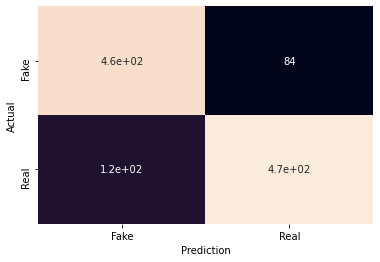

In [38]:
c = confusion_matrix(y_test, preds)
ax = sns.heatmap(c, annot=True, xticklabels=['Fake','Real'],yticklabels=['Fake','Real'],cbar=False)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')

In [39]:
confusion_matrix(y_test, preds)

array([[461,  84],
       [116, 474]], dtype=int64)

In [40]:
FPR, TPR, _ = roc_curve(y_test, preds)

Text(0, 0.5, 'TPR')

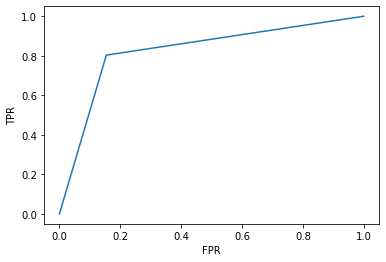

In [41]:
## https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/
plt.plot(FPR, TPR)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [42]:
def predict(x):
    x = vec.transform([x])
    x = x.toarray()
    pred = mlp.predict(x)
    return pred    

In [43]:
predict('donald trump wins election')

array([1], dtype=int64)

In [44]:
predict('reports on debate tonight')

array([0], dtype=int64)

In [45]:
predict('drinking bleach cures covid')

array([1], dtype=int64)

In [46]:
#when i changed this from is or isis to the islamic state it went from fake to real
predict('islamic state spreads across north africa')

array([0], dtype=int64)

In [47]:
predict('al shabab getting weaker')

array([0], dtype=int64)

In [48]:
predict('monkey pox america')

array([1], dtype=int64)

In [49]:
predict('russia commits war crimes')

array([1], dtype=int64)

In [51]:
import pickle
filename = 'mlp_model'
pickle.dump(mlp,open(filename, 'wb'))

In [52]:
filename2 = 'tfidfunigrams_trigrams_model'
pickle.dump(vec,open(filename2, 'wb'))